<div style="border:solid Chocolate 2px; padding: 40px">

<b>Hello, Pranita!👋 How are you today?</b>
    
My name is Arina U., we have already met with you at one of the previous sprints, this time I am glad to be your reviewer in this project! Nice to meet you again!<br />


You can find my comments in <font color='green'>green</font>, <font color='gold'>yellow</font> and <font color='red'>red</font> boxes. Examples you can see below:
    
<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> In case if task is completely correct and everything is alright!
</div>


<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b>  In case when I can give some advice that can help you to improve your work or recommend you some useful links and resources that can help you widen your knowledge and help in future tasks.
</div>

<div class="alert alert-block alert-danger">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Needs fixing!🤔:</b> In case when step requires some extra work and some corrections. Project can't be accepted with comments in the red boxes
</div>

Please pay attention to not move or change my comments. It would be good to highlight your answers in some way. 

#### <font color='Purple'>Student's commentary:</font> for example like this <a class="tocSkip"> </div>
    
OK, now let's go!😏
</font>

# Making Business Decisions Based on Data

#### Project description:

We are working on a project for a big online store. Together with the marketing department, we complied a list of hypotheses that may help boost revenue.
We need to prioritize these hypotheses, launch an A/B test, and analyze the results.


##### Data description
##### Data used in the first part of the project

##### /datasets/hypotheses_us.csv Download dataset
- Hypotheses — brief descriptions of the hypotheses
- Reach — user reach, on a scale of one to ten
- Impact — impact on users, on a scale of one to ten
- Confidence — confidence in the hypothesis, on a scale of one to ten
- Effort — the resources required to test a hypothesis, on a scale of one to ten. The higher the Effort value, the more resource-intensive the test.

##### /datasets/orders_us.csv Download dataset
- transactionId — order identifier
- visitorId — identifier of the user who placed the order
- date — of the order
- revenue — from the order
- group — the A/B test group that the user belongs to

##### /datasets/visits_us.csv Download dataset
- date — date
- group — A/B test group
- visits — the number of visits on the date specified in the A/B test group specified

#### Steps to take:
- Step 1: Open the data file and study the general information.
- Step 2: Prepare the data 
    - We will view the data in more detail to convert them to the required types, replace the column names and find missing values.Find and eliminate errors in the data.
- Step 3: Prioritizing Hypotheses
    - The task is to:
        - Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.
        - Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority.
        - Show how the prioritization of hypotheses changes when you use RICE instead of ICE. Provide an explanation for the changes.
        
- Step 4: A/B Test Analysis

  
#### Goal:
Our goal is to prioritize a list of hypotheses compiled and launch an A/B test, and analyze the results and determined which group is better.


<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, Pranita, it is great that you formulated the main goal of the project!

## Step 1. Open the data file and study the general information

In [1]:
##### Import default libraries
try:
    import pandas as pd # manipulate and wrangle the data  
    import numpy as np
    import matplotlib.pyplot as plt #2d plotting library which produces publication quality figures in a variety of formats
    import seaborn as sns # Seaborn provides a high-level interface for drawing attractive and informative statistical graphics
except:
    print("An exception occurred")
    
from scipy import stats # for mathematics, science, and engineering
from math import ceil as math
from scipy import stats as st

#pd.set_option('max_colwidth', 400)

#read data from file
hypotheses  = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')

orders = pd.read_csv('/datasets/orders_us.csv', sep=',')

visits = pd.read_csv('/datasets/visits_us.csv', sep=',')



<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b>  
       
To import the data it is better to use the `try-except` construction, it allows to avoid errors that can be caused by incorrect paths to files. More information see below:
       
https://www.w3schools.com/python/python_try_except.asp

In [2]:
# preview the loaded data
hypotheses.info()

# return the top n- rows of dataframe
hypotheses.head(100)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Effort        9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [3]:
# preview the loaded data
orders.info()

# return the top n- rows of dataframe
orders.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null float64
group            1197 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
95,372616894,457167155,2019-08-22,20.2,B
96,1170105516,2706377257,2019-08-01,140.8,A
97,2012801741,414545763,2019-08-01,90.5,B
98,1962247337,2706377257,2019-08-01,110.7,A


In [4]:
# preview the loaded data
visits.info()

# return the top n- rows of dataframe
visits.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date      62 non-null object
group     62 non-null object
visits    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


### Conclusion:

We checked the general information of 'hypotheses', 'orders', 'visits' datasets.
Upon checking the data, we found that the datasets are much cleaner. We didn't find any big issues and discrepancies. 
However, there are few minor issues like renaming column names and converting date columns to DateTime which we will take care in the steps below.



<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, Pranita, good job, you studied data in detail, let's move on!

##  Step 2: Prepare the data 
In this step, we are viewing the data in more detail to convert them to the necessary types. Find and eliminate errors in the data 

In [5]:
# Converting column names to lower case 

#hypotheses['hypothesis'] = hypotheses['Hypothesis'].str.lower()
hypotheses.rename(columns = {'Hypothesis':'hypothesis',
                             'Reach':'reach',
                             'Impact':'impact',
                             'Confidence':'confidence',
                             'Effort':'effort'}, inplace = True)
display(hypotheses)

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [6]:
# Converting date columns to datetime 

orders['date'] = pd.to_datetime(orders['date'])
print(orders)

visits['date'] = pd.to_datetime(visits['date'])
print(visits)


      transactionId   visitorId       date  revenue group
0        3667963787  3312258926 2019-08-15     30.4     B
1        2804400009  3642806036 2019-08-15     15.2     B
2        2961555356  4069496402 2019-08-15     10.2     A
3        3797467345  1196621759 2019-08-15    155.1     B
4        2282983706  2322279887 2019-08-15     40.5     B
...             ...         ...        ...      ...   ...
1192     2662137336  3733762160 2019-08-14    100.8     B
1193     2203539145   370388673 2019-08-14     50.1     A
1194     1807773912   573423106 2019-08-14    165.3     A
1195     1947021204  1614305549 2019-08-14      5.5     A
1196     3936777065  2108080724 2019-08-15   3120.1     B

[1197 rows x 5 columns]
         date group  visits
0  2019-08-01     A     719
1  2019-08-02     A     619
2  2019-08-03     A     507
3  2019-08-04     A     717
4  2019-08-05     A     756
..        ...   ...     ...
57 2019-08-27     B     720
58 2019-08-28     B     654
59 2019-08-29     B     531

In [7]:
# Removing duplicates
orders = orders.drop_duplicates()
visits = visits.drop_duplicates()

# drop any missing values if any
orders = orders.dropna()
visits = visits.dropna()


In [8]:
# Checking if some of the visitors might have gotten into both group A and group B.

visitors_in_2groups = orders[orders.groupby('visitorId')['group'].transform('nunique') > 1]

print(visitors_in_2groups)

      transactionId   visitorId       date  revenue group
2        2961555356  4069496402 2019-08-15     10.2     A
20       2904772834   963407295 2019-08-15      5.6     B
23       4252514150   351125977 2019-08-15    235.6     B
24       1162046357  3234906277 2019-08-15    120.2     B
26       2223239646   199603092 2019-08-15     55.7     A
...             ...         ...        ...      ...   ...
1182     2682156369  1668030113 2019-08-14     20.8     B
1183     1458356232   963407295 2019-08-14     80.0     A
1184     1329499668  2949041841 2019-08-14    160.7     B
1189     4082620617   393266494 2019-08-14    490.4     B
1195     1947021204  1614305549 2019-08-14      5.5     A

[181 rows x 5 columns]


In [9]:
# Removing duplicates
orders.drop(orders[orders.groupby('visitorId')['group'].transform('nunique') > 1].index, inplace = True)

orders.group.value_counts()

B    548
A    468
Name: group, dtype: int64

#### Conclusion:
181 visitors belong to both groups A and group B. A/B test must be performed between two independent groups. Hence, we filtered out the visitors that are in both groups.

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b>

Good job at this stage: the data have been opened and observed. I like your way as you have prepared the data for the following study.
    
Perfectly, you have checked the test participants who could take part in both groups. I agree with you that it is reasonable to drop them. But anyway, we have to work with aggregation data in the `visits` dataframe, and we cannot detect these users there. So, if we drop these users from the `orders` dataframe, we will decrease a little the conversion value. I guess it is not so important here because this is a training project, but in a real situation, we need more information.

</div>

<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b> 

We can customize the dataframe and display the hypotheses fully. To do this, use this setting after importing the pandas library: `pd.set_option('max_colwidth', 400)`

### Part 1. Prioritizing Hypotheses

#### Apply the ICE framework to prioritize hypotheses

In [10]:
# for each row, applying formula = (impact * confidence) / effort

hypotheses['ICE'] = (hypotheses['impact']*hypotheses['confidence'])/hypotheses['effort']

display(hypotheses[['hypothesis','ICE']].sort_values(by='ICE', ascending=False))


,hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


#### Conclusion:
The most promising hypotheses are 8, 0, and 7 as they have highest ICE scores above 11 whereas hypotheses 4 has least score.

#### Apply the RICE framework to prioritize hypotheses

In [11]:

# for each row, applying formula RICE = (impact * confidence * reach) / effort

hypotheses['RICE'] = (hypotheses['reach']*hypotheses['impact']*hypotheses['confidence'])/hypotheses['effort']

# sort in descending order
display(hypotheses[['hypothesis','RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


#### Conclusion:
Hypotheses 7,2, 0, and 6 have highest RICE score whereas hypothesis 4 has least score. The prioritization of hypotheses changed when we use RICE instead of ICE.


### Show how the prioritization of hypotheses changes when you use RICE instead of ICE

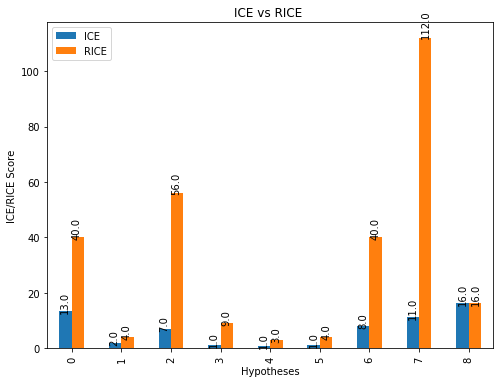

In [12]:
# Plot the figure.

ax = hypotheses[['hypothesis','ICE','RICE']].plot(kind='bar',stacked=False, figsize=(8,6))

for p in ax.patches:
    ax.annotate(str(p.get_height().round()), (p.get_x() * 1.005, p.get_height() * 1.005), rotation=90)
    
plt.title('ICE vs RICE ')
plt.xlabel('Hypotheses')
plt.ylabel('ICE/RICE Score')
plt.show()

#### Conclusion:
RICE is a framework for prioritizing product ideas and features. The abbreviation includes 4 factors that the product manager can safely use to evaluate and prioritize product features:
Reach - coverage
Impact - Impact
Confidence - confidence in your assessment of coverage, impact and labor.
Effort - labor costs
We calculate ICE score using following formula
ICE = (Reach) * (Confidence) * (Effort)/Impact

ICE is a framework for selecting feature work based on 3 key dimensions, enabling teams to make better decisions on what features work to prioritise:
Impact - How much will this change our business (if it works)
Confidence - How confident are we that this will work?
Ease - How much work is it to implement?
We calculate ICE score using following formula
ICE = (Impact) * (Confidence) * (Ease)

The difference between ICE and RICE frameworks is the reach parameter, which estimates how many customers will be reached using polling. This parameters adds another factor to the framework, making RICE scores higher than ICE scores. As such, the RICE framework will be impacted by the reach factor and the RICE score will be skewed accordingly.

According to the plotting above, hypotheses 7 score is the clear winner in both ICE and RICE scores and should be prioritised. Hypotheses 1,3,4, and 5 scores low in both ICE and RICE.

In ICE, hypotheses 8 was the highest but it is only 5th with the RICE scores. hypotheses 7 was 3rd in ICE but on top and twice as much score as hypotheses 2. The differences are due to the Reach values of the hypotheses. The hypotheses with higher reach, impact, and confidence, and comparatively lower effort have comparatively higher RICE score, for instance, hypothsis 7 which is 3rd highest in ICE but jumped up to the highest rank in RICE because it's reach is high.


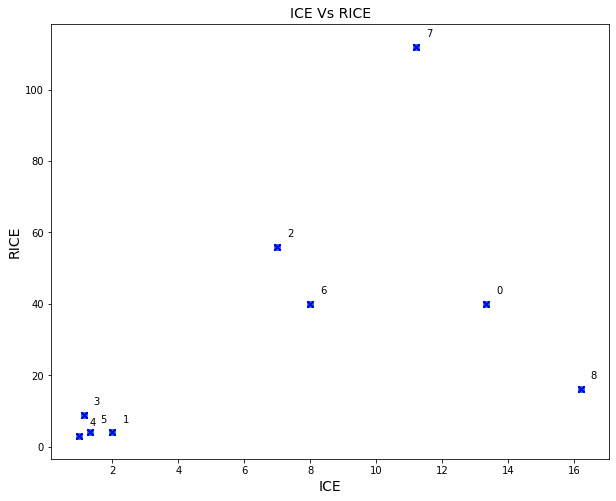

In [13]:
# Scatter plot to visualize ICE and RICE

x = hypotheses['ICE'].values
y = hypotheses['RICE'].values
types = hypotheses.index.values

fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x, y)

ax.set_xlabel('ICE', fontsize=14)
ax.set_ylabel('RICE', fontsize=14)
ax.set_title('ICE Vs RICE', fontsize=14)

for i, txt in enumerate(types):
    ax.annotate(txt, (x[i], y[i]), xytext=(10,10), textcoords='offset points')
    plt.scatter(x, y, marker='x', color='blue')

#### Conclusion:
From the scatter plot above, we can conclude that, hypothesis 7 scores higher in both ICE and RICE, hypothesis 8 only scores higher in ICE. Hypothesis 1,3,4, and 5 scores low in both ICE and RICE.

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b>

It is a good example of how the `reach factor` influences the hypotheses to rank within the `RICE` framework compared to the `ICE` one. You have provided informative plots that allow us to compare the results of the two frameworks.

<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b>
       
As a recommendation: the project will be better if you add here a brief description of two frameworks.

<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b>

As a recommendation: we could also compare frameworks values by plotting the `ICE/RICE` scatter plot or another kind of graph. 

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, you managed to create a rather informative scatter plot, keep it up!

### Part 2. A/B Test Analysis


### Plot cumulative revenue by group graph. Make conclusions and conjectures.

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   2266.6       719
1 2019-08-01     B      17      17    967.2       713
2 2019-08-02     A      42      36   3734.9      1338
3 2019-08-02     B      40      39   3535.3      1294
4 2019-08-03     A      66      60   5550.1      1845


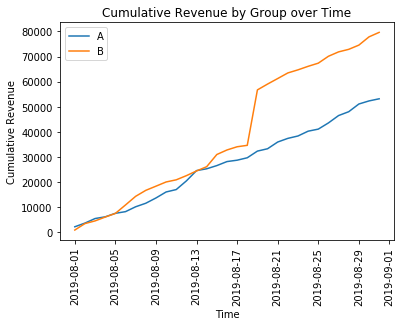

In [14]:
#print(visits.head(5))
#print(orders.head(5))
# building an array with unique paired date-group values
revenueGroup = orders[['date','group']].copy()

revenueGroup = revenueGroup.drop_duplicates()

# getting aggregated cumulative daily data on orders 
ordersAggregated = revenueGroup.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# getting aggregated cumulative daily data on visitors  
visitorsAggregated = revenueGroup.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

# merging the two tables into one and giving its columns descriptive names
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 

# cumulative orders and cumulative revenue by day for groups A/B
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date','revenue','orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date','revenue','orders']]


# Plotting the group A revenue graph 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Plotting the group B revenue graph 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend() 
plt.title('Cumulative Revenue by Group over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Revenue')
plt.xticks(rotation=90)
plt.show()

#### Conclusion:
Based on the plot above, the cumulative revenue for both groups raised steadily throughout the whole test. However, in 2019, group B spiked in revenue at certain points which is after August 17. The cumulative revenue of group B increased and kept increasing upward.


### Plot cumulative average order size by group graph. Make conclusions and conjectures.

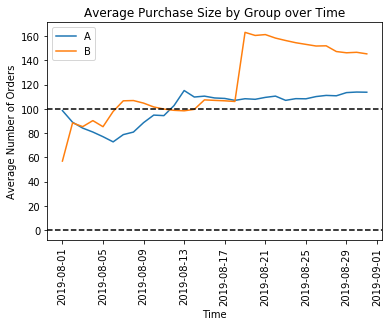

In [15]:
# diving the revenue by the cumulative number of orders
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

# adding the X axis
plt.axhline(y=0, color='black', linestyle='--') 
plt.axhline(y=100, color='black', linestyle='--')
plt.legend()
plt.title('Average Purchase Size by Group over Time')
plt.xlabel('Time')
plt.ylabel('Average Number of Orders')
plt.xticks(rotation=90)
plt.show()

#### Conclusion:
Based on the plotting above, both the groups have fluctuating average order sizes. After August 21, 2019, both the lines become a bit steady. There is a big spike in average order for Group B at a certain point whereas group A fell lower a bit at the start and slowly picked up. However, The average order size of Group B is much higher than group A. Group A is far below group B.

### Plot the relative difference in cumulative average order size for group B compared with group A graph. Make conclusions and conjectures.

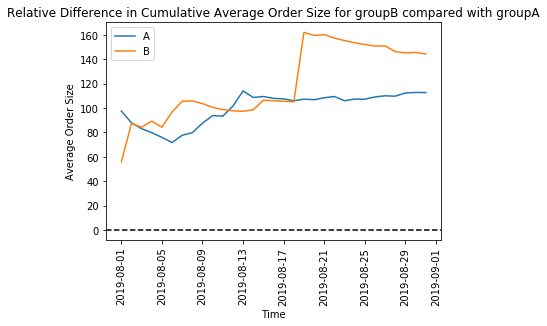

In [16]:
# gathering the data into one DataFrame
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# plotting a relative difference graph for the average purchase sizes
plt.plot(mergedCumulativeRevenue['date'], mergedCumulativeRevenue['revenueA'] / mergedCumulativeRevenue['ordersA'] -1, label='A')
plt.plot(mergedCumulativeRevenue['date'], mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB'] -1, label='B')


# adding the X axis
plt.axhline(y=0, color='black', linestyle='--') 
plt.legend()
plt.title('Relative Difference in Cumulative Average Order Size for groupB compared with groupA')
plt.xlabel('Time')
plt.ylabel('Average Order Size')
plt.xticks(rotation=90)
plt.show()

#### Conclusion:
Based on the plotting above, group B started with a jump and between August 17, 2019 and August 21,2019, there was a sudden jump in average order size where as group A fell slightly for few months and slowly picked up. There were many fluctuations for both the groups but compare to group B, group A has much better average order size.


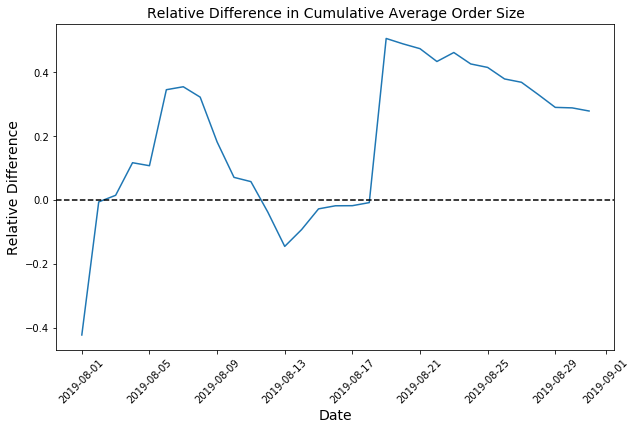

In [17]:
#(Added) Relative Difference in Cumulative Average Order Size

mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

fig, ax = plt.subplots()
fig.set_size_inches(10,6)
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

ax.set_title("Relative Difference in Cumulative Average Order Size", fontdict={"size":14})
plt.xlabel("Date", fontdict={"size":14})
plt.ylabel("Relative Difference", fontdict={"size":14})
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.show()

### Conclusion:
On the plot above, we saw several ups and downs, i.e. the difference between the segments spikes from below -0.4 to above 0.5. This means there must be some big orders and outliers or abnormally large purchases.

<div class="alert alert-block alert-danger">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Needs fixing!🤔:</b> 
        
Pranita, pay more attention to this plot: it is the same as the one above, you need to get next plots here:
        
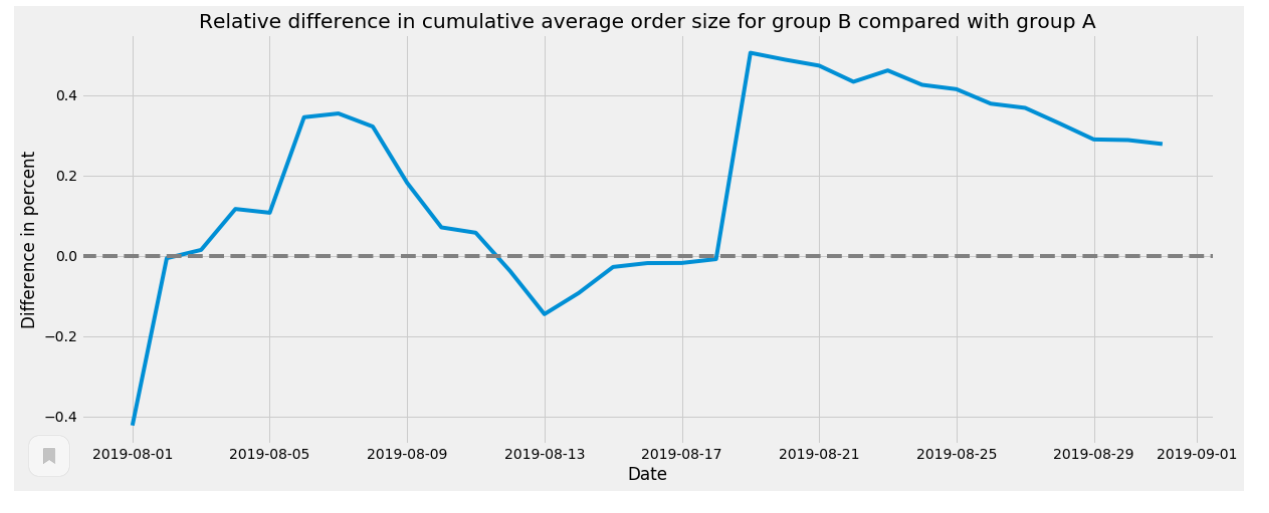
        


<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary: second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Correct plot!


### Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. 

### Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.

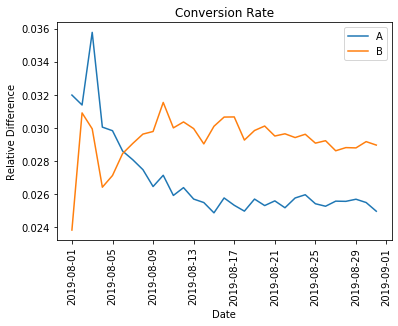

In [18]:
# calculating cumulative conversion
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# selecting data on group A 
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# selecting data on group B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# plotting the graphs
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.legend()
plt.title('Conversion Rate')
plt.xlabel('Date')
plt.ylabel('Relative Difference')
plt.xticks(rotation=90)
plt.show()

### Conclusion:
Based on the plotting above, the conversion rate of both groups was very fluctuating. Group B started with a much higher spike at start. After few days, group A went down and Group B took over and lead till the end of the test.  

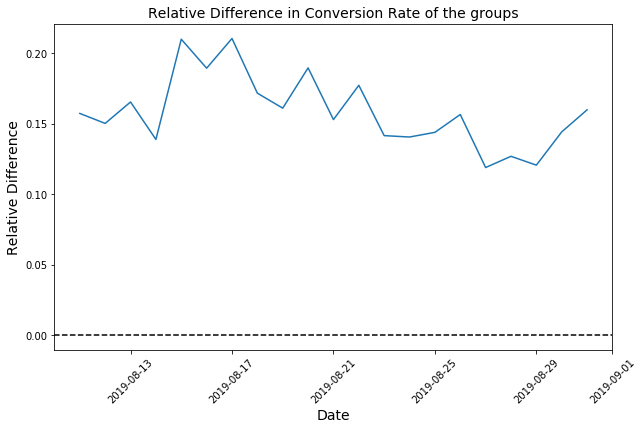

In [19]:
# (Added)Relative Difference in Conversion Rate of the groups
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

mergedCumulativeConversions['conversionB'] = mergedCumulativeConversions.query('date > "2019-08-10"')['conversionB']
mergedCumulativeConversions['conversionA'] = mergedCumulativeConversions.query('date > "2019-08-10"')['conversionA']

fig, ax = plt.subplots()
fig.set_size_inches(10,6)


plt.plot(mergedCumulativeConversions['date'],(mergedCumulativeConversions['conversionB']/
    mergedCumulativeConversions['conversionA']-1))


ax.set_title("Relative Difference in Conversion Rate of the groups", fontdict={"size":14})
plt.xlabel("Date", fontdict={"size":14})
plt.ylabel("Relative Difference", fontdict={"size":14})
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.show()

### Conclusion:
The relative difference in conversion rate does not show high fluctuation after 2019-08-10. Hence, we are considering data only after 2019-08-10 as it could be considered close to stable.

Based on the plotting, the difference between the segments fluctuate between 0.15 and 0.20.


<div class="alert alert-block alert-danger">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Needs fixing!🤔:</b> 
        
Pranita, one plot is need to be plotted here:
        
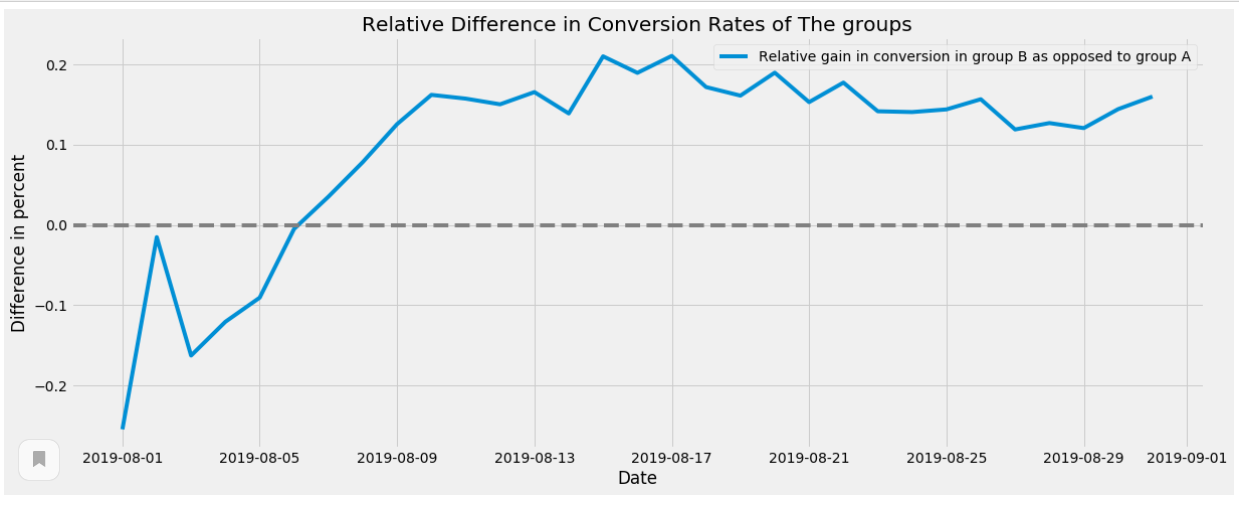
        
At such plots we could also add the line shown the relative difference in conversion rate using calculations. For example, we could see that since 2019-08-10, the relative difference in conversion rate does not show high fluctuation and could be considered close to stable. So, we can add the next calculations:
    
```python
line = (mergedCumulativeConversions.query('date > "2019-08-10"')['conversionB']/
    mergedCumulativeConversions.query('date > "2019-08-10"')['conversionA']-1).mean()
plt.axhline(y=line, color='red', linestyle='--');
   
```   

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary: second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍</b> 

### Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.

In [20]:
print(orders)

      transactionId   visitorId       date  revenue group
0        3667963787  3312258926 2019-08-15     30.4     B
1        2804400009  3642806036 2019-08-15     15.2     B
3        3797467345  1196621759 2019-08-15    155.1     B
4        2282983706  2322279887 2019-08-15     40.5     B
5         182168103   935554773 2019-08-15     35.0     B
...             ...         ...        ...      ...   ...
1191     3592955527   608641596 2019-08-14    255.7     B
1192     2662137336  3733762160 2019-08-14    100.8     B
1193     2203539145   370388673 2019-08-14     50.1     A
1194     1807773912   573423106 2019-08-14    165.3     A
1196     3936777065  2108080724 2019-08-15   3120.1     B

[1016 rows x 5 columns]


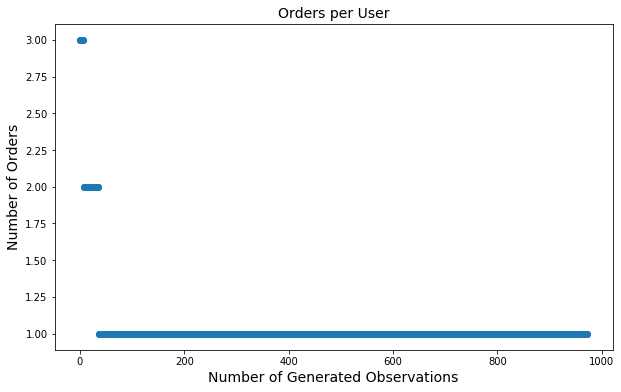

In [21]:
ordersByUsers = orders.groupby('visitorId', as_index=False).agg({'transactionId':pd.Series.nunique})
ordersByUsers.columns = ['userId', 'no_of_orders']

# drop any duplicates
ordersByUsers = ordersByUsers.drop_duplicates()
# sort data by number of orders in descending orders
ordersByUsers = ordersByUsers.sort_values(by='no_of_orders', ascending=False)
#print(ordersByUsers)

fig, ax = plt.subplots()
fig.set_size_inches(10,6)
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['no_of_orders']) 
ax.set_title("Orders per User", fontdict={"size":14})
plt.xlabel("Number of Generated Observations", fontdict={"size":14})
plt.ylabel("Number of Orders", fontdict={"size":14})
plt.show()

### Conclusion:
Based on plotting above, the number of orders per user is mostly 1 or 2 orders. Very few users order above 3 or 4 units.

### Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.

In [22]:
print(np.percentile(ordersByUsers['no_of_orders'], [95,99]))

[1. 2.]


#### Conclusion:
Based on percentile calculations above, 95% of the observations are within 1 order per user and 99% of observations are within 2 orders per user. Hence, filtering out the number of orders is greater than 2 orders would be the point at which the data value becomes an anomaly.

### Plot a scatter chart of order prices. Make conclusions and conjectures.

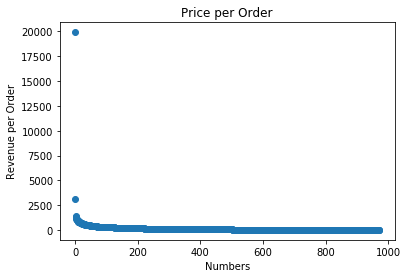

In [23]:
#print(visits)
# group the orders by users

ordersByPrices= orders.groupby('visitorId', as_index=False).agg({'revenue':'sum'})
ordersByPrices.columns = ['userId', 'revenue']

ordersByPrices = ordersByPrices.drop_duplicates()

# sort data by number of orders in descending orders
ordersByPrices = ordersByPrices.sort_values(by='revenue', ascending=False)

# find values for horizontal axis by the number of generated observations 
x_values = pd.Series(range(0, len(ordersByPrices)))

plt.scatter(x_values, ordersByPrices['revenue'])

plt.title('Price per Order')
plt.xlabel('Numbers')
plt.ylabel('Revenue per Order')
plt.show()

#### Conclusion:
Based on above plotting, the revenue is mostly before 2500.  There were very few orders above 2500.



### Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.


In [24]:
print(np.percentile(ordersByPrices['revenue'], [95,99]))

[449.5   912.576]


#### Conclusion:
Based on above percentile calculations, we can conclude that 95 % of the observations are within 450 dollars per order and 99% of obercations are within 900 dollars per order. We can define the point at which the data value becomes an anomaly as any observation where the revenue is greater than 450 dollars. 

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, Pranita, as a whole you correctly identified the outliers in the data, good job!


<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b> 

We could improve it by coloring it in A-B group colors: https://plotly.com/python/line-and-scatter/#set-size-and-color-with-column-names The same recommendation is for other similar plots. 

### Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.

In [25]:
# calculate statistical significance of difference in conversion between groups 
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']


sampleAFiltered = pd.concat([ordersByUsersA['orders'], pd.Series(0, index = np.arange(visits[visits['group'] == 'A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0)
sampleBFiltered = pd.concat([ordersByUsersB['orders'], pd.Series(0, index = np.arange(visits[visits['group'] == 'B']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0)

p_value = st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]
print('p_value: {0:.3f}'.format(p_value))
print("Relative Conversion rate: {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

# alpha is Significance level
alpha = 0.05

if p_value < alpha:
    print('Rejecting the null hypothesis: there is significant difference between the conversion rate of groups A and B')
else:
    print('Failed to reject H0 :there is no significant difference between the conversion rate of groups A and B')

p_value: 0.007
Relative Conversion rate: 0.155
Rejecting the null hypothesis: there is significant difference between the conversion rate of groups A and B


### Conclusion:
We tested if there is statistical significance of the difference in conversion between groups A and B or not by using the Mann-Wilcoxon-Whitney non-parametric test. This test ranks two samples in ascending order and compares the ranks of the values that appears in both samples. 

Null Hypothesis H0: There is no statistically significant difference in conversion between groups A and B. 

Alternative Hypothesis H1: There is a statistically significant difference in conversion between groups A and B.

The p_value of 0.006 is less than the alpha level of 0.05 which means we can reject the null hypothesis and determine the difference between the conversion rate of groups A and B is statistically significant. 

 Therefore,group B's relative gain of about %16 is significant.

### Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.

In [26]:
p_value = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
print('p_value: {0:.3f}'.format(p_value))

relative_conversion = orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1
print("Relative Conversion:{0:.3f}".format(relative_conversion))

# critical statistical significance level
alpha = 0.05

if p_value < alpha:
    print('H0 rejected: there is a statistically significant difference in average order size between groups A and B ')
else:
    print('Failed to reject H0:  There is no statistically significant difference in average order size between groups A and B')

p_value: 0.431
Relative Conversion:0.278
Failed to reject H0:  There is no statistically significant difference in average order size between groups A and B


### Conclusion:
We tested the statistical significance of the difference in average order size between groups A and B by using the Mann-Wilcoxon-Whitney non-parametric test. This test ranks two samples in ascending order and compares the ranks of the values that appears in both samples. 

Null Hypothesis H0: There is no statistically significant difference in average order size between groups A and B. 

Alternative Hypothesis H1: There is a statistically significant difference in average order size between groups A and B.

The p_value of 0.4 is greater than than the alpha level of 0.05 which means we rejected the null hypothesis and and determine the difference in average order size of groups A and B is no statistically significant.
However, there is relative a gain for group B (about 28%).

### Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.

In [27]:
#identify anomalous users with tooo many orders
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 4]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 4]['userId']], axis = 0)

# identify anomalous users with expensive orders
usersWithExpensiveOrders = orders[orders['revenue'] > 20000]['visitorId']

# join them into abnormal table and remove duplicated
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()


# calculate statistical signifiacne of the difference in conversion between groups using filtered data
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0) 

print('p_value: {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Relative Conversion rate:{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

# critical statistical significance level
alpha = 0.05

if p_value < alpha:
    print('Rejecting the null hypothesis: there is a significant difference in conversion between groups A and B. ')
else:
    print('Failed to reject H0 : there is no statistically significant difference in conversion between groups A and B')

p_value: 0.006
Relative Conversion rate:0.160
Failed to reject H0 : there is no statistically significant difference in conversion between groups A and B


### Conclusion:

We filtered raw data by two criterion, the number of orders and the revenue per order. 
Null Hypothesis H0: There is no statistically significant difference in conversion between groups A and B. 

Alternative Hypothesis H1: There is a statistically significant difference in conversion between groups A and B.

The p_value of 0.006 is way less than the alpha level of 0.05 which means we can reject the null hypothesis and determine the difference between the conversion rate of groups A and B is no statistically significant. 
Therefore, group B's relative gain of about %17 is significant

### Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.

In [28]:
p_value = st.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]
print('p_value: {0:.3f}'.format(p_value))

# critical statistical significance level
alpha = 0.05

if p_value < alpha:
    print('We reject the null hypothesis')
else:
    print('We can not reject the null hypothesis')

p_value: 0.431
We can not reject the null hypothesis


### Conclusion:

We started with null Hypothesis (H0) which is there is no statistically significant difference in average order size between groups A and B. 

The alternative Hypothesis (H1) which is there is a statistically significant difference in average order size between groups A and B.

We uses an alpha of 0.05, which means that only in 5% of cases will we reject the null hypothesis when it is true.

The p_value of 0.43 is greater than than the alpha level of 0.05 which means we can failed to reject to the null hypothesis and make conclusions that there is no statistically significant difference in average order size between groups A and B.

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, Pranita, what you did absolutely correct:
        
1) you correctly chose the test for statistical hypotheses testing
        
2) you correctly interpreted the results
        
3) it is great that you formulated H1 and H0 in each case


<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b> 
        
Please, add the labels for values within test results (what it p-value and what is value for relative gain?) and add the value for relative gain, now you only show the p-value.
        

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary: second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, agree with new version:)

### Make a decision based on the test results. 

Based on the test results, we can take a decison to stop the test,consider group B as the leader and it is safe to make a data-driven recommendation to marketing specialists that group B is better as it generates greater cumulative revenue and have higher average order sizes.

Although there is no signficant difference between the groups considering their average order size, there is statistically and signicant difference in conversion between the groups, and group B's relative conversion gain is significant.
The test is therefore, successful.


<div class="alert alert-block alert-danger">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Needs fixing!🤔:</b> 
        
Pranita, in the final conclusion you need to make a decision based on the test results. 
        
The possible decisions are: 1. Stop the test, consider one of the groups the leader. 2. Stop the test, conclude that there is no difference between the groups. 3. Continue the test.
        
So please, try to widen your final conclusion based on this topic from the instruction and your results from the analysis.

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary: second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, agree with your conclusion!

<div style="border:solid Chocolate 2px; padding: 40px">

**The overall review conclusion**

Pranita, thank you for submitting your project! I can see that you've worked really hard on it! I'm really impressed this the amount of work you have done. But there are several things in your project which I suppose it is important to fix in order to make your project really ideal! My comments will navigate you!


**Good things and practices in your project I want to highlight🙂**:

* You used different methods for working with your data. It is really great that you can apply these methods on practice, keep it up!
* You worked with the visualization, it is really good that you use plots in your work!
* You formulated conclusions after each step of the analysis, I can see your analytical approach!
* You chose the correct test at the last step of the analysis, keep it up!
    
**What is worth working on👀**:


* Some plots are incorrect and some are absent
* It is better to fix the final conclusion.


**Good luck! I will wait for your work for a second iteration of the review!😉**
![gif](https://media.giphy.com/media/l41Yh1olOKd1Tgbw4/giphy.gif)  

<div style="border:solid Chocolate 2px; padding: 40px">

**The overall review conclusion: second iteration of the review**

Pranita, thank you for submitting your project with corrections!
    
You did a great job to improve the project, I can see your progress and agree with all your corrections, so I hasten to say that your project has been accepted and you can proceed to the next sprint!
    
**I wish you exciting and cool projects in the next sprints😉**

![gif](https://media.giphy.com/media/l3UcjBJUov1gCRGbS/giphy.gif)  